In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)
import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

# loading data
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

Using TensorFlow backend.


train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [2]:
# normalization 
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

# numerical label to one hot encoding
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

In [3]:
# model construction 

model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3), input_shape=(32, 32,3), activation='relu', padding='same'))
model.add(Dropout(rate=0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(rate=0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(10, activation='softmax'))

print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxP

In [4]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


In [5]:
model.compile(loss='mse', optimizer='sgd' , metrics=['accuracy'])

#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=64, verbose=1)         


Instructions for updating:
Use tf.cast instead.
Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 110s 3ms/step - loss: 0.0903 - acc: 0.1107 - val_loss: 0.0897 - val_acc: 0.1367
Epoch 2/12
37500/37500 [==============================] - 108s 3ms/step - loss: 0.0899 - acc: 0.1200 - val_loss: 0.0896 - val_acc: 0.1490
Epoch 3/12
37500/37500 [==============================] - 109s 3ms/step - loss: 0.0896 - acc: 0.1324 - val_loss: 0.0895 - val_acc: 0.1649
Epoch 4/12
37500/37500 [==============================] - 110s 3ms/step - loss: 0.0894 - acc: 0.1432 - val_loss: 0.0893 - val_acc: 0.1830
Epoch 5/12
37500/37500 [==============================] - 110s 3ms/step - loss: 0.0892 - acc: 0.1525 - val_loss: 0.0891 - val_acc: 0.1864
Epoch 6/12
37500/37500 [==============================] - 110s 3ms/step - loss: 0.0890 - acc: 0.1617 - val_loss: 0.0890 - val_acc: 0.2053
Epoch 7/12
37500/37500 [==============================] - 110s 3ms/step - 

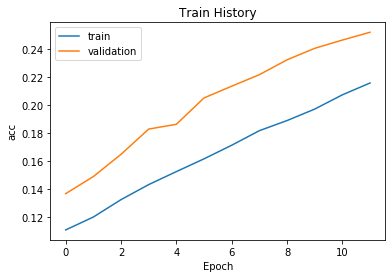

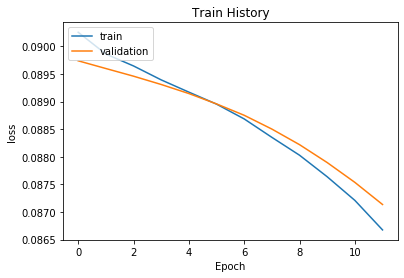

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')

In [17]:
# loading data
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

# normalization 
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

# numerical label to one hot encoding
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

# model construction 

model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3), input_shape=(32, 32,3), activation='relu', padding='same'))
model.add(Dropout(rate=0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(rate=0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(10, activation='softmax'))

print(model.summary())

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_13 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_14 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 64)          0         
________________________

In [21]:
import keras
opt = keras.optimizers.Adam(lr=0.001, decay=0)
model.compile(loss='binary_crossentropy', optimizer=opt , metrics=['accuracy'])

#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=32, verbose=1) 

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 184s 5ms/step - loss: 0.2267 - acc: 0.9135 - val_loss: 0.1996 - val_acc: 0.9222
Epoch 2/12
37500/37500 [==============================] - 185s 5ms/step - loss: 0.1772 - acc: 0.9305 - val_loss: 0.1675 - val_acc: 0.9344
Epoch 3/12
37500/37500 [==============================] - 185s 5ms/step - loss: 0.1533 - acc: 0.9397 - val_loss: 0.1567 - val_acc: 0.9391
Epoch 4/12
37500/37500 [==============================] - 186s 5ms/step - loss: 0.1357 - acc: 0.9468 - val_loss: 0.1475 - val_acc: 0.9430
Epoch 5/12
37500/37500 [==============================] - 186s 5ms/step - loss: 0.1224 - acc: 0.9522 - val_loss: 0.1423 - val_acc: 0.9444
Epoch 6/12
37500/37500 [==============================] - 186s 5ms/step - loss: 0.1094 - acc: 0.9573 - val_loss: 0.1380 - val_acc: 0.9465
Epoch 7/12
37500/37500 [==============================] - 211s 6ms/step - loss: 0.0971 - acc: 0.9619 - val_loss: 0.1277 - 

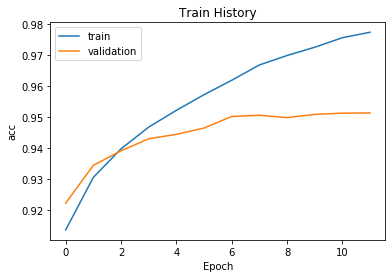

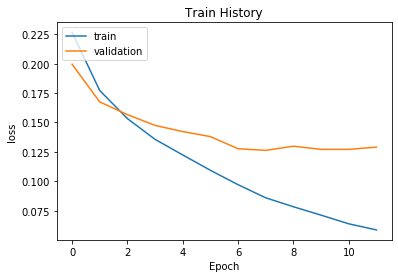

In [22]:
show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')